In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx

import sys; sys.path.insert(0, '..') # add parent folder path where discrepancies folder is

from discrepancies import datasets, pool, pool2graph, evaluation, discrepancies_intervals, pool2graph_cat_FJ2_2

RANDOM_STATE = 42

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get data and fit a pool of classifiers on it

#X_train, X_test, y_train, y_test, scaler, feature_names, target_names, cat_names = datasets.get_dataset(dataset='adult-cat')
X_train, X_test, y_train, y_test, scaler, feature_names, target_names, cat_names = datasets.get_dataset(dataset='german')

print(X_train.shape, y_train.mean())
cont_names = list(set(feature_names) - set(cat_names))

(670, 12) 0.7029850746268657


In [14]:

pool1 = pool.BasicPool()
pool1 = pool1.fit(X_train, y_train)

preds = pool1.predict(X_test)
from sklearn.metrics import f1_score
print({c: f1_score(y_test, preds[c]) for c in preds.columns})


p2g = pool2graph_cat_FJ2_2.pool2graph(X_train, y_train, pool1, k_init=30, categorical_names=cat_names)
#p2g = pool2graph.pool2graph(X_train, y_train, pool1, k_init=3)

p2g.fit(max_epochs=10)
print(len(p2g.G.nodes))

{'SVMrbf': 0.8235294117647058, 'RF50': 0.8007889546351085}


INFO:root:### EPOCH #1
INFO:root:### EPOCH #2
INFO:root:### EPOCH #3
INFO:root:### EPOCH #4
INFO:root:### EPOCH #5
INFO:root:### EPOCH #6
INFO:root:### EPOCH #7
INFO:root:### EPOCH #8
INFO:root:### EPOCH #9
INFO:root:### EPOCH #10


87243


In [15]:
from discrepancies import discrepancies_intervals
intervals = discrepancies_intervals.get_discrepancies_intervals(p2g.G)
print(len(intervals))

21869


# Global analysis of the intervals

In [44]:
%load_ext autoreload

%autoreload 2
from discrepancies import analysis_global

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
### we work with that    
gda = analysis_global.GlobalDiscrepancyAnalyzer(p2g, pool1, intervals, X_train, cat_names)

Intervals amplitude dataset (self.amplitude_dataset): shape (21869, 12)
Input data preprocessed (self.X): shape (670, 13)
Nodes dataset (self.nodes_dataset): shape (87243, 13)


### Most problematic features

For now, we evaluate separately the uncertainty associated to each feature for continuous and categorical features.
- For continuous features: Average range of the discrepancy interval along the feature
- For categorical features: proportion of intervals generated along the feature, normalized by the exposition in Xtrain --> pas sûr qu'il faille normaliser par ça... car intercalle = 2 pts, X_train= chaque pt


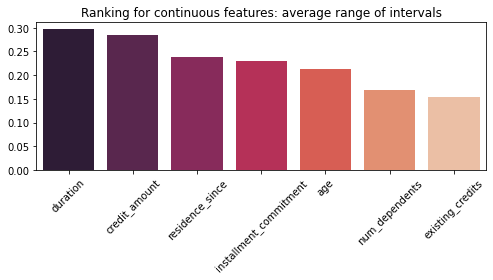

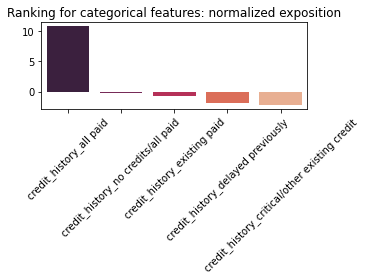

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

feat_imp = gda.get_global_discrepancy_importances(min_expo=10)
gda.plot_feature_importances()

## Important areas of discrepancy

In [48]:
gda.get_discrepancy_segments(X_exposition=X_train, min_expo=0.03, min_purity=0.7, min_purity_expo=0.0)

accuracy 0.7467991701339936
accuracy on given data 0.7134328358208956
====== SEGMENT 43 ======
=== Segment description:
decision node 0 : duration > 0.9670781791210175)
decision node 40 : installment_commitment <= -0.4511070102453232)
decision node 41 : credit_history_existing paid > 0.5)
=== Segment characteristics
Segment exposition: 0.03134328358208955
Segment purity: 0.7142359296044607
Segment purity (X_expo): 0.3333333333333333
====== SEGMENT 48 ======
=== Segment description:
decision node 0 : duration > 0.9670781791210175)
decision node 40 : installment_commitment > -0.4511070102453232)
decision node 44 : age > -0.5287940204143524)
decision node 46 : age > 0.5118827521800995)
=== Segment characteristics
Segment exposition: 0.028358208955223882
Segment purity: 0.7230586370839936
Segment purity (X_expo): 0.3684210526315789
